# Ronak Nandanwar

## Task 1 Supervised Learning by The Sparks Foundation
### Predict the score of an student based on the no. of study hours they studied.

#### Importing the libraries needed

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### load the dataset

In [27]:
df = pd.read_csv('Task1_train.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### description of the dataset

In [28]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
df.isnull().sum()
# checking if there is any null values or not

Hours     0
Scores    0
dtype: int64

#### There is no null values in the dataset 

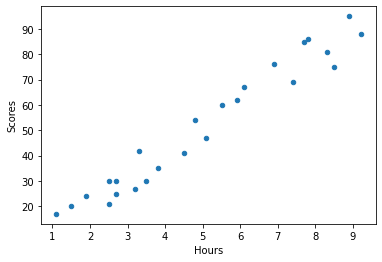

In [30]:
df.plot(kind = 'scatter',x='Hours',y='Scores')
plt.show()
# plotting the graph using dataset

In [31]:
X = df.drop(columns=['Scores'],axis=1)
y = df.Scores
# separating the independent and dependant features
# Independent Feature: Hours
# Dependent Feature: Scores

#### here from above graph we can see that as the number of hour increases the score increases
#### for this type of case we can use Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
lr = LinearRegression()

In [74]:
# splitting train and test data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [75]:
x_train.shape
# checking the shape of train data

(20, 1)

In [76]:
x_test.shape
# checking the shape of test data

(5, 1)

In [77]:
# model training on training data
lr.fit(x_train,y_train)


LinearRegression()

In [78]:
# checking the r2 of model
lr.score(x_train,y_train)

0.9454367725240987

In [79]:
# model prediction on test data
y_pred = lr.predict(x_test)
y_pred

array([39.59421488, 56.68453365, 16.47201889, 93.8811098 , 84.83329398])

In [80]:
# r2 score of model on test data
lr.score(x_test,y_test)

0.9723939704109644

In [81]:
type(y_test)

pandas.core.series.Series

In [82]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,39.594215
1,56.684534
2,16.472019
3,93.881110
4,84.833294


In [83]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(drop=True,inplace=True)
type(y_test)
type(y_pred)

pandas.core.frame.DataFrame

In [84]:
actual_vs_predict = pd.concat([y_test,y_pred],axis=1)

In [85]:
actual_vs_predict.columns = ['Actual','Predict']


In [86]:
actual_vs_predict

,Actual,Predict
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


In [87]:
lr.predict([[9.5]])

array([96.89704841])

In [90]:
line = lr.coef_*x_train + lr.intercept_

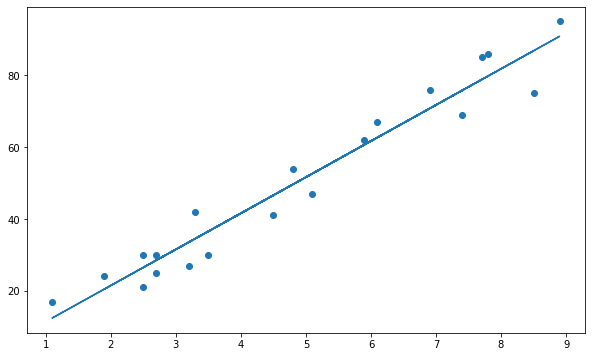

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train)
plt.plot(x_train,line)
plt.xlabel = 'Hours'
plt.ylabel = 'Scores'
plt.show()
# plotting graph for training data

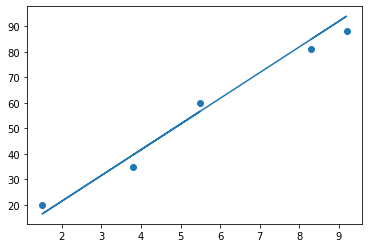

In [92]:
line = lr.coef_*x_test + lr.intercept_
plt.scatter(x_test,y_test)
plt.plot(x_test,line)
plt.show()
# plotting graph on testing data

### Lasso , Ridge , ElasticNet Regression

In [93]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

#### we need to select alpha

In [94]:
lasso_cv = LassoCV(alphas=None,cv=3,max_iter=1000,normalize=True)

In [95]:
lasso_cv.fit(x_train,y_train)

LassoCV(cv=3, normalize=True)

In [96]:
lasso_cv.alpha_

0.005274540454587851

#### Training of model

In [97]:
lasso_reg = Lasso(alpha=lasso_cv.alpha_,)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005274540454587851)

In [117]:
lasso_reg.predict(x_test)

array([39.59522083, 56.68391092, 16.47522836, 93.87694228, 84.82998871])

In [118]:
lasso_reg.score(x_test,y_test)

0.9724185652163784

In [119]:
lasso_reg.predict([[9.25]])

array([94.37955082])

### Ridge Regression

#### findin alpha for ridge regression

In [100]:
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridge_cv = RidgeCV(alphas=alphas,cv=3,normalize=True)
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([0.17183914, 0.87097805, 1.00412433, 8.8156404 , 2.83314822,
       3.17037539, 1.15154262, 6.40148306, 3.21764829, 5.96020511,
       5.42180014, 6.78532428, 1.8433977 , 8.55628301, 9.45560976,
       0.68010617, 8.28778284, 1.92517463, 3.57115943, 9.45993245,
       9.82163051, 9.62568057, 0.89273975, 1.27995348, 4.21094076,
       5.03479652, 1.67476168, 5.63615181, 3.3800734 , 0.50031758,
       0.43496461, 8.91668443, 9.18597041, 7.67708459, 4.16613761,
       7.02959917, 7.20384709, 2.32893197, 7.96133506, 2.49159003,
       4.93757148, 7.3427745 , 0.70495349, 2.1181425 , 1.44960151,
       1.87399521, 8.19887189, 0.17770534, 6.97145273, 1.8383178 ]),
        cv=3, normalize=True)

In [101]:
ridge_cv.alpha_

0.17183913690359653

#### Training of model

In [102]:
ridge_reg = Ridge(alpha=ridge_cv.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.17183913690359653)

In [103]:
ridge_reg.score(x_test,y_test)

0.9727931548069093

In [104]:
y_pred = ridge_reg.predict(x_test)

In [105]:
y_pred

array([39.61066271, 56.67435166, 16.5244953 , 93.81296879, 84.77925111])

In [106]:
ridge_reg.predict([[9.25]])

array([94.31484199])

### ElasticNet 

In [107]:
elastic_cv = ElasticNetCV(alphas=None,cv=4)

In [108]:
elastic_cv.fit(x_train,y_train)

ElasticNetCV(cv=4)

In [109]:
elastic_cv.alpha_

0.18040526863833223

In [110]:
elastic_reg = ElasticNet(alpha=elastic_cv.alpha_)

In [111]:
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=0.18040526863833223)

In [112]:
elastic_reg.predict(x_test)

array([39.78129994, 56.56871908, 17.06890934, 93.1060431 , 84.21858591])

In [113]:
elastic_reg.score(x_test,y_test)

0.97656326299643

In [114]:
elastic_reg.predict([[9.5]])

array([96.06852883])